# Dataset

Descargar y descomprimir el dataset desde dropbox.

In [ ]:
!wget -O clothes.zip https://www.dropbox.com/scl/fi/p59aaokhqfv20evxdlwqw/test_pepeganga.zip?rlkey=0hyr40zlthg5upt4g7ougphkg&st=i1axj4uy&dl=1

In [ ]:
!unzip clothes.zip

Definir el path al archivo principal (**test_pepeganga**). Dentro, este tiene una carpeta llamada **test** con las imágenes de los productos y un archivo CSV llamado **test.csv** con metadata de estos mismos.

In [21]:
DATA_PATH = 'test_pepeganga'
DATA_IMAGES_PATH = 'test_pepeganga/test'

En el archivo **test.csv** la metadata se relaciona con los productos con la columna **Id**. Por lo tanto, se puede crear un DataFrame de pandas para representar ese CSV con esas mismas Ids y no con unas default incrementales.

In [13]:
import os
import pandas as pd

data = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), sep = ';') # Acá se crea el DF con ids incrementales default
data.set_index("Id", inplace = True) # Acá se corrige el index para cada producto

Ejecutar en caso de que se quiera visualizar la data.

In [14]:
data

,Url,ProductId,ImageUrl,Title,Brand,CategoryTree,GlobalCategory,ProductCode,ProductDescription,ProductDescriptionEN,GlobalCategoryEN
Id,,,,,,,,,,,
141877,https://www.pepeganga.com/sillin-d3735-mtb-rut...,79778,https://pepeganga.vteximg.com.br/arquivos/ids/...,Sillín D3735 MTB Ruta - GW,GW,Deportes/Accesorios/otros,Deportes,53598,Este fantástico Sillín para bicicleta que te t...,This fantastic bicycle saddle that GW brings y...,Sports
106641,https://www.pepeganga.com/juego-de-sala-navara...,59065,https://pepeganga.vteximg.com.br/arquivos/ids/...,Juego de Sala Navara Cuero y Mesa de Centro Ho...,Hogar venecia,Muebles/Muebles de Sala/Juegos de Sala,Muebles,SLNAVCOCO,Decora tu hogar con este espectacular y fabulo...,Decorate your home with this spectacular and f...,Furniture
107803,https://www.pepeganga.com/comedero-doble-skyba...,60090,https://pepeganga.vteximg.com.br/arquivos/ids/...,Comedero Doble Skybar Moderna Blanco Para Perr...,Moderna,Mascotas/Perros/Comederos y Bebederos,Mascotas,AK50-354,En este practico y moderno Comedero Doble Skyb...,In this practical and modern Double Skybar Fee...,Pets
105533,https://www.pepeganga.com/sofa-cama-porto-cuer...,58301,https://pepeganga.vteximg.com.br/arquivos/ids/...,Sofacama Porto Cuero Sintético Negro - Hogar V...,Hogar venecia,Muebles/Muebles de Sala/Sofa Camas,Muebles,PORTO,El Sofacama Porto cuenta con una estructura en...,"The Porto Sofabed has a pine wood structure, f...",Furniture
110932,https://www.pepeganga.com/juego-de-sabanas-kar...,61985,https://pepeganga.vteximg.com.br/arquivos/ids/...,Juego de Sábanas Karytex Semidoble - Coral,Karytex,Hogar/Ropa de cama/Juegos de Sabanas,Hogar,11636-Coral,Disfruta de la suavidad que te brinda este esp...,Enjoy the softness that this spectacular Karyt...,Home
...,...,...,...,...,...,...,...,...,...,...,...
122714,https://www.pepeganga.com/pijama-2-piezas-cami...,69692,https://pepeganga.vteximg.com.br/arquivos/ids/...,Pijama 2 Piezas Camiseta Blanca y Pantalón Adu...,Garfield,Ropa y Zapatos/Adultos/Ropa Mujer,Ropa y Zapatos,GFCD05,"Vive una noche grandiosa de mucho descanso, co...","Live a great night of rest, with these fabulou...",Clothes and Shoes
83405,https://www.pepeganga.com/set-2-chupos-fun-sty...,44779,https://pepeganga.vteximg.com.br/arquivos/ids/...,Set 2 Chupos Fun Style - 6 a 18m,TOMMEE TIPPEE,Bebes/Alimentacion/Teteros y chupos/Chupos de ...,Bebes,MAY00015-02,¡Los chupos Fun Style de Tommee Tippee convert...,Tommee Tippee's Fun Style pacifiers will turn ...,Babies
113076,https://www.pepeganga.com/figura-periquito-opa...,63606,https://pepeganga.vteximg.com.br/arquivos/ids/...,Figura Periquito Opalino Amarillo Nanoblock,Nanoblock,Jugueteria/Didacticos/Bloques,Jugueteria,NBC_004,Ahora tus hijos podrán disfrutar del hobby de ...,Now your children can enjoy the hobby of const...,Toy Store


Como solamente estamos interesados en las columnas **GlobalCategoryEN** y **ProductDescriptionEN**, podemos eliminar las demás de la data.

In [15]:
data[['GlobalCategoryEN', 'ProductDescriptionEN']]

,GlobalCategoryEN,ProductDescriptionEN
Id,,
141877,Sports,This fantastic bicycle saddle that GW brings y...
106641,Furniture,Decorate your home with this spectacular and f...
107803,Pets,In this practical and modern Double Skybar Fee...
105533,Furniture,"The Porto Sofabed has a pine wood structure, f..."
110932,Home,Enjoy the softness that this spectacular Karyt...
...,...,...
122714,Clothes and Shoes,"Live a great night of rest, with these fabulou..."
83405,Babies,Tommee Tippee's Fun Style pacifiers will turn ...
113076,Toy Store,Now your children can enjoy the hobby of const...


Obtener la imagen y descripción de un producto en base a su ID.

In [26]:
from PIL import Image

def get_image(id):
  IMG_PATH = os.path.join(DATA_IMAGES_PATH, str(id) + ".jpg")
  img = Image.open(IMG_PATH)
  return img

# get_description, además de recibir el id del producto, recibe el
# DataFrame con el que estemos trabajando ('data').

def get_description(dataframe, id):
  desc = dataframe.loc[id]["ProductDescriptionEN"]
  return desc

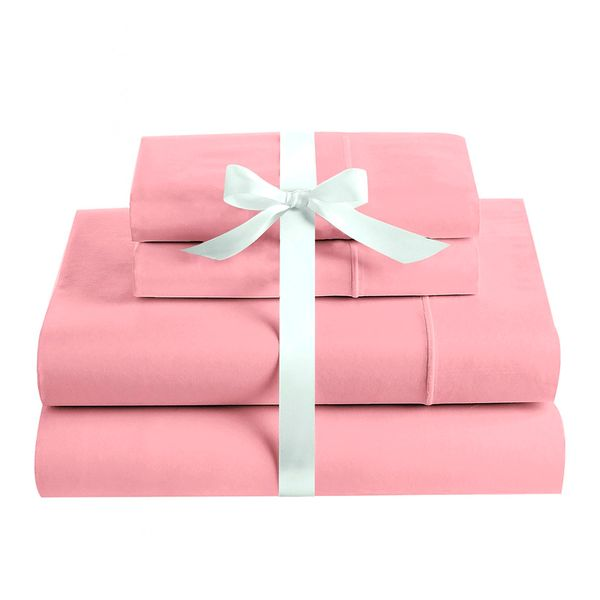

In [23]:
get_image(110932)

In [24]:
get_description(data, 110932)

'Enjoy the softness that this spectacular Karytex Sheet Set gives you, with which you can obtain unique nights of relaxation and comfort, since it has soft microfiber in contact with your skin. It is also 100% Colombian for a greater duration and resistance, and the best thing is that it is easy to wash and dry. Go ahead and buy it now!'

# Descargar CLIP

In [27]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2rqkb1da
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2rqkb1da
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=11a426eb9e51a13c986d8633421f2ecffee9c2c1158fabe2bf31f77ded376a12
  Stored in directory: /tmp/pip-ephem-wheel-cache-0tng4v3m/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
